<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-08-25 01:28:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-08-25 01:28:03 (16.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!pip install seaborn

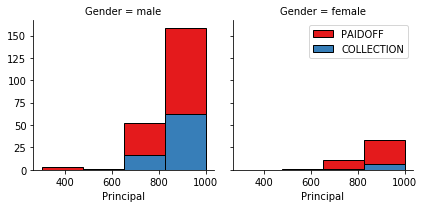

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 5)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [9]:
df['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

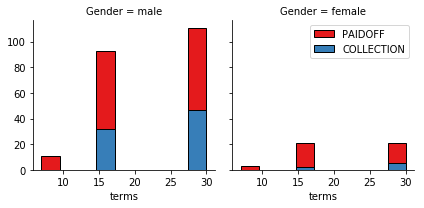

In [10]:
#Inspect the tersm variable
bins = np.linspace(df.terms.min(), df.terms.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'terms', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

The variable *terms* might be converted from continuous to discreet variable because it has only 3 levels.

In [11]:
df['terms'].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

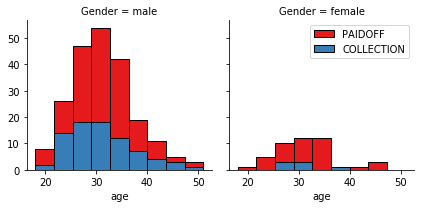

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

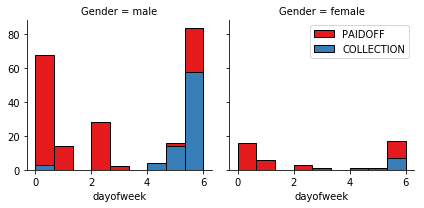

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

We can see that only 'Master or Above' category has an increased amount of unpaid loans, most likely, education loans.

#### Feature befor One Hot Encoding

In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]

#Let's convert education to dummies
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)

#Let's convert Terms to dummies
Feature = pd.concat([Feature,pd.get_dummies(Feature['terms'], prefix = "Term")], axis=1)
Feature.drop(['terms'], axis = 1,inplace=True)
Feature.head()


,Principal,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college,Term_7,Term_15,Term_30
0,1000,45,0,0,0,1,0,0,0,0,1
1,1000,33,1,0,1,0,0,0,0,0,1
2,1000,27,0,0,0,0,0,1,0,1,0
3,1000,28,1,1,0,0,0,1,0,0,1
4,1000,29,0,1,0,0,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [20]:
X = Feature
X[0:5]

,Principal,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college,Term_7,Term_15,Term_30
0,1000,45,0,0,0,1,0,0,0,0,1
1,1000,33,1,0,1,0,0,0,0,0,1
2,1000,27,0,0,0,0,0,1,0,1,0
3,1000,28,1,1,0,0,0,1,0,0,1
4,1000,29,0,1,0,0,0,1,0,0,1


What are our lables?

In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [22]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  2.33152555, -0.42056004, -1.20577805, -0.38170062,
         1.13639374, -0.07624929, -0.86968108, -0.20535013, -0.86456622,
         0.93831486],
       [ 0.51578458,  0.34170148,  2.37778177, -1.20577805,  2.61985426,
        -0.87997669, -0.07624929, -0.86968108, -0.20535013, -0.86456622,
         0.93831486],
       [ 0.51578458, -0.65321055, -0.42056004, -1.20577805, -0.38170062,
        -0.87997669, -0.07624929,  1.14984679, -0.20535013,  1.1566494 ,
        -1.06574034],
       [ 0.51578458, -0.48739188,  2.37778177,  0.82934003, -0.38170062,
        -0.87997669, -0.07624929,  1.14984679, -0.20535013, -0.86456622,
         0.93831486],
       [ 0.51578458, -0.3215732 , -0.42056004,  0.82934003, -0.38170062,
        -0.87997669, -0.07624929,  1.14984679, -0.20535013, -0.86456622,
         0.93831486]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Building a Model

### Import modules from sklearn

In [23]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score # cross-validation for parameter tuning

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

#### Finding the best *k* for KNN

First, let's see how both train and test accuracies depend on the value of *k*, using **train_test_split** with 30% test data.|

In [24]:
# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(balanced_accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs_knn = GridSearchCV(KNeighborsClassifier(),
                  param_grid={'n_neighbors': np.arange(1, 8)},
                  scoring=scoring, refit='AUC', return_train_score=True, cv = 5)
gs_knn.fit(X, y)
results = gs_knn.cv_results_

best_params = gs_knn.best_params_

print("Tuned Model Parameters: {}".format(best_params))

Tuned Model Parameters: {'n_neighbors': 7}


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
results['param_n_neighbors'].data

array([1, 2, 3, 4, 5, 6, 7], dtype=object)

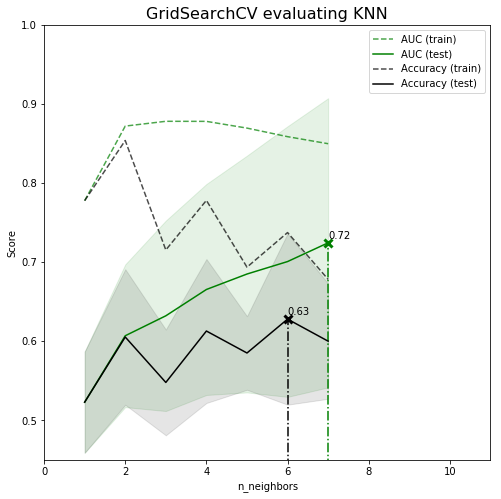

In [26]:
plt.figure(figsize=(8, 8))
plt.title("GridSearchCV evaluating KNN",
          fontsize=16)

plt.xlabel("n_neighbors")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 8)
ax.set_ylim(0.45, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_n_neighbors'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

Let's find the best k in a range from 1 to 12, using cross-validation with **'balanced_accuracy'** as scoring parameter because our data are not balanced between the classes.

### Build KNN using the best k = 6 and initital data X and y

After we identified the best *k* value, we can build the kNN model in order to evaluate it later on a new test set. We'll use all the data X, y for modelling.

In [27]:
#build KNN model for a given k
k = 6
knn = KNeighborsClassifier(n_neighbors = k).fit(X,y)

# Decision Tree

In [28]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

Data preprocessing??

In [29]:
# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(balanced_accuracy_score)}

# Specify the hyperparameter space
parameters = {'max_depth':np.arange(1, 10),
              'min_samples_split':[2, 3, 5]}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs_tree = GridSearchCV(DecisionTreeClassifier(),
                  param_grid = parameters,
                  scoring= scoring, refit='AUC', return_train_score=True, cv = 5)
gs_tree.fit(X, y)
tree_results = gs_tree.cv_results_
tree_best_params = gs_tree.best_params_

print("Tuned Model Parameters: {}".format(tree_best_params))

Tuned Model Parameters: {'max_depth': 2, 'min_samples_split': 2}


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Let's plot the results of grid search for Decision Tree Classifier

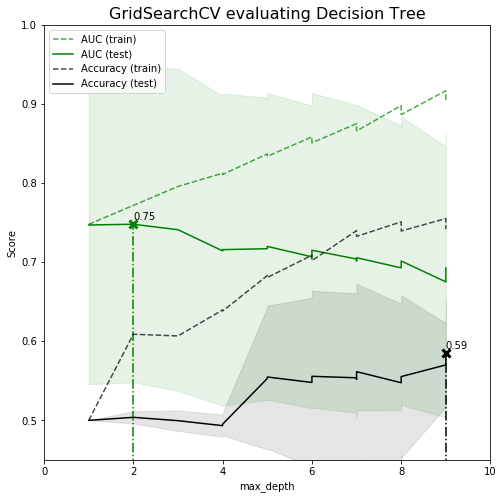

In [30]:
plt.figure(figsize=(8, 8))
plt.title("GridSearchCV evaluating Decision Tree",
          fontsize=16)

plt.xlabel("max_depth")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 10)
ax.set_ylim(0.45, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(tree_results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = tree_results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = tree_results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(tree_results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = tree_results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In search for the balance between AUC and balanced accuracy, we should pick max_depth = 5.

### Build Decision Tree using the best max_depth = 5, min_samples_split = 2 and initital data X and y

In [31]:
#Build a tree
depth = 5
samples_split = 2
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = depth, min_samples_split = samples_split).fit(X,y)


In [32]:
!pip install pydotplus

In [33]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

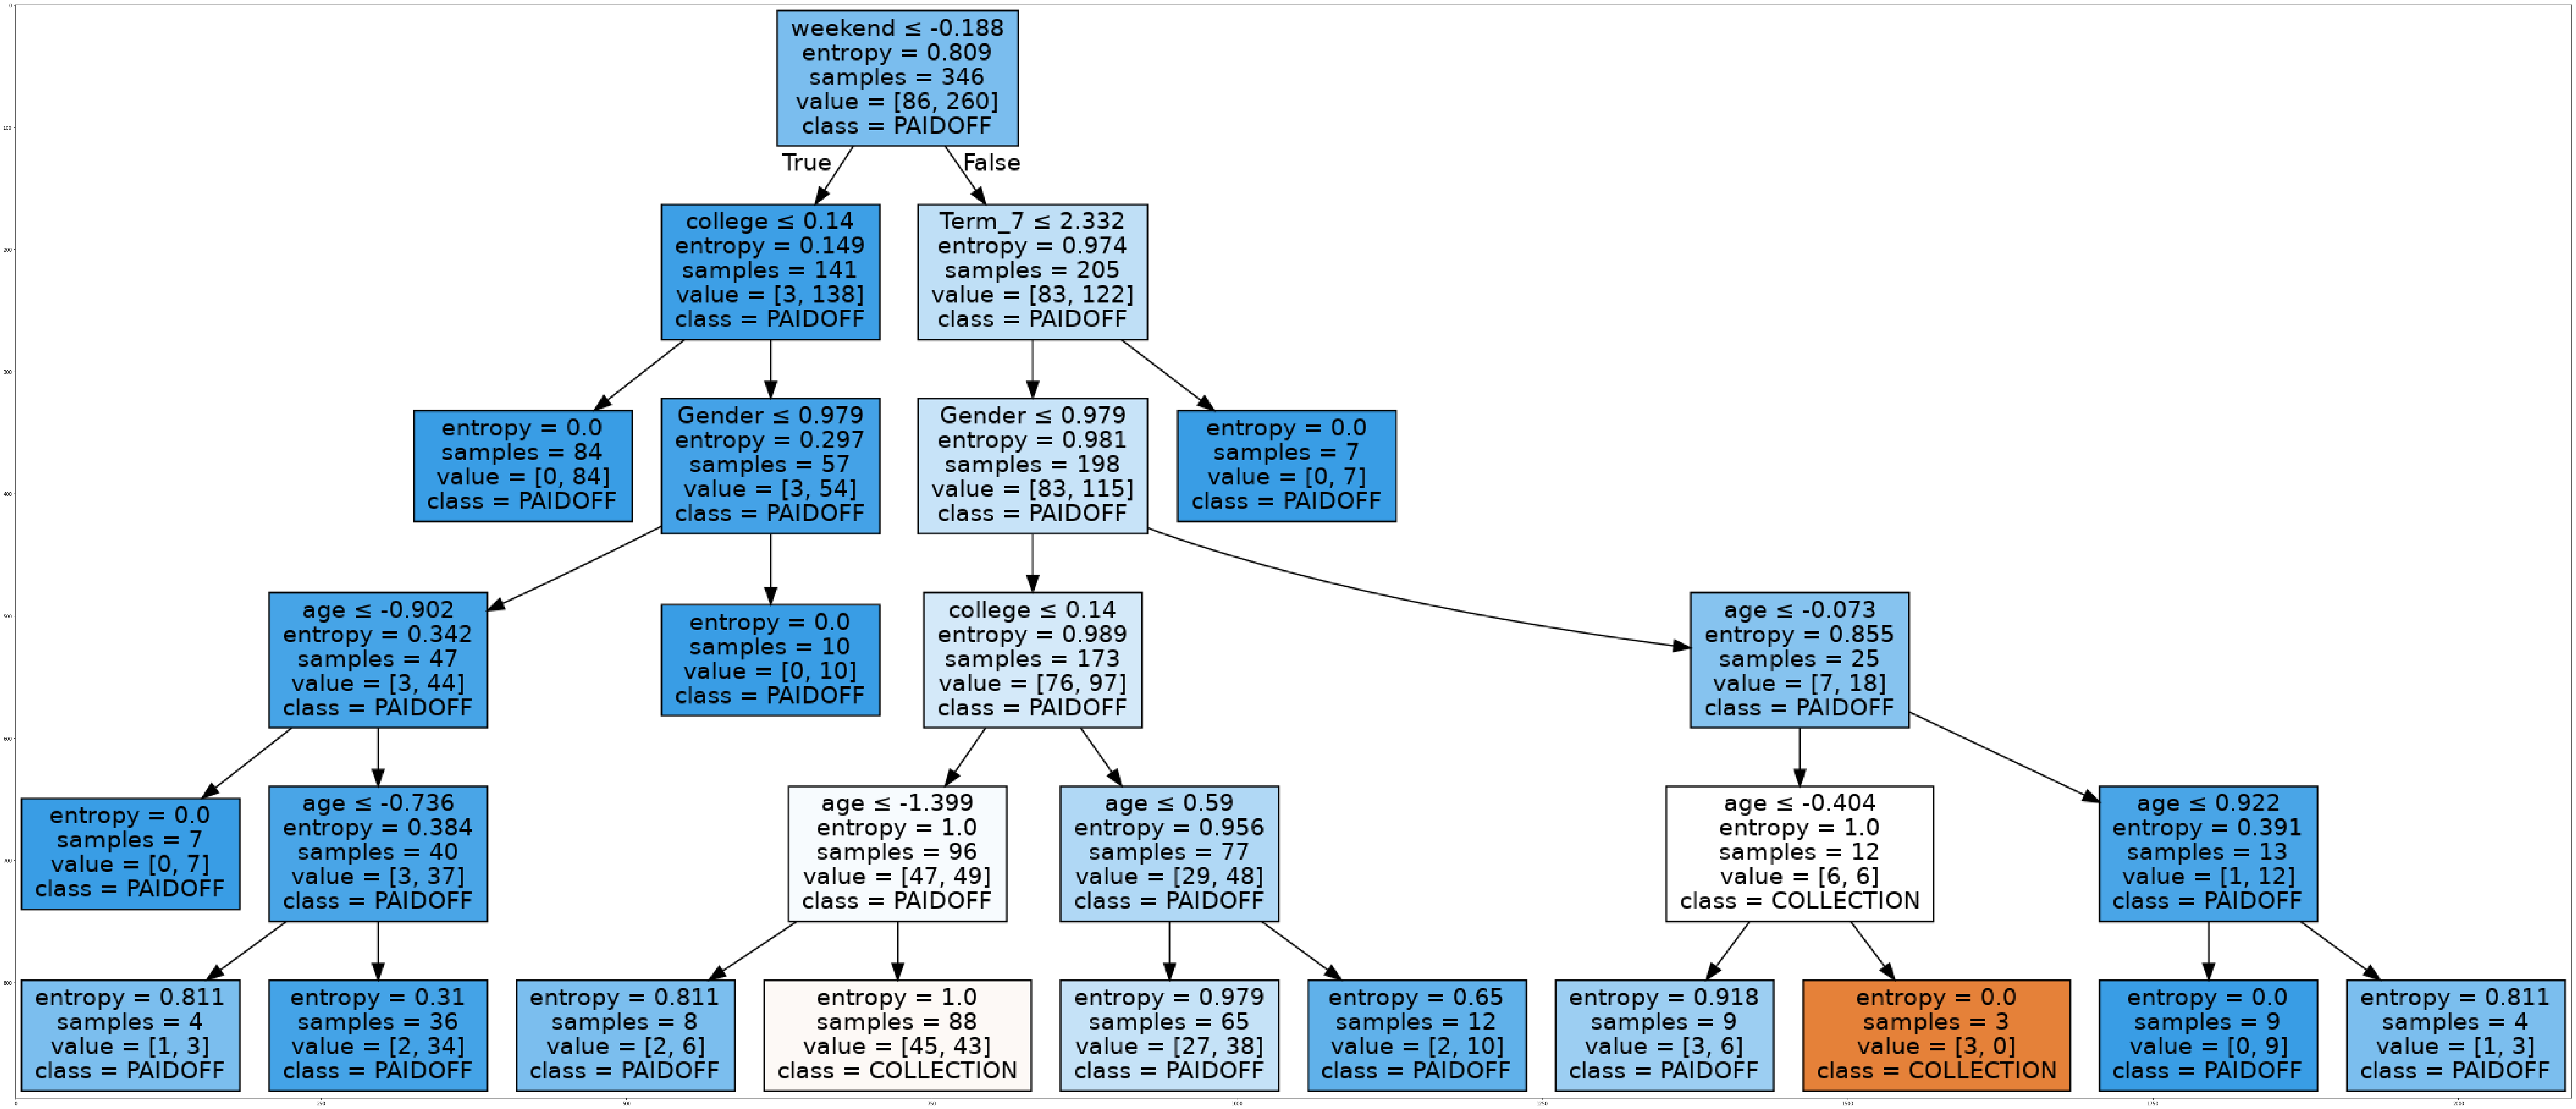

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, stratify = y)


dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature.columns
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_test), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [ ]:
# Import necessary modules
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit

from matplotlib.colors import Normalize



# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


In [ ]:
# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(balanced_accuracy_score)}

# Specify the hyperparameter space
C_range = [0.1, 0.5, 1, 5,10] #np.logspace(-1, 1.2, 5)
gamma_range = [1, 0.1, 0.01, 0.001]
parameters = dict(gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs_svm = GridSearchCV(SVC(),
                  param_grid = parameters,
                  scoring= scoring, refit='AUC', return_train_score=True, cv = cv)
gs_svm.fit(X, y)
svm_results = gs_svm.cv_results_

scores = svm_results['mean_test_Accuracy'].reshape(len(C_range), len(gamma_range))
svm_best_params = gs_svm.best_params_

print("Tuned Model Parameters: {} \n Best Score: {}".format(svm_best_params, gs_svm.best_score_))

In [ ]:
# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.4, midpoint=0.6))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

# Draw heatmap of the validation AUC as a function of gamma and C
#


scores_auc = svm_results['mean_test_AUC'].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_auc, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.6, midpoint=0.75))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation AUC')
plt.show()

Both balanced accuracy and AUC give contradicting estimates for parameters. Pick best parameters based on AUC.

### Build SVM classifier using C = 5, gamma = 0.01 and initital data X and y


In [ ]:
#Build SVM classifier with chosen parameters
svm = SVC(C= 5, gamma = 0.01).fit(X,y)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [ ]:
# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(balanced_accuracy_score)}

# Specify the hyperparameter space
parameters = {'C':[0.1, 0.2, 0.5, 5,10],
              'solver':["newton-cg", "liblinear","saga"]}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs_lr = GridSearchCV(LogisticRegression(),
                  param_grid = parameters,
                  scoring= scoring, refit='AUC', return_train_score=True, cv = 10)
gs_lr.fit(X, y)
lr_results = gs_lr.cv_results_
lr_best_params = gs_lr.best_params_

print("Tuned Model Parameters: {} \n Best Score: {}".format(lr_best_params, gs_lr.best_score_))

Tuned Model Parameters: {'C': 0.1, 'solver': 'newton-cg'} 

# Model Evaluation using Test set

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation 

In [ ]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

### Preparing Test set for evaluation 

In [ ]:
#Work on dates
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

####Features
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]

#Let's convert education to dummies
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)

#Let's convert Terms to dummies
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_Feature['terms'], prefix = "Term")], axis=1)
test_Feature.drop(['terms'], axis = 1,inplace=True)
test_Feature.head()




In [ ]:
X_test = test_Feature
X[0:5]
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X[0:5]

In [ ]:
y_test = test_df['loan_status'].values
y[0:5]

#### KNN metrics

In [ ]:
#build KNN model for a given k
k = 7
knn = KNeighborsClassifier(n_neighbors = k).fit(X,y)


yhat = knn.predict(X_test)

f1 = f1_score(y_test, yhat, average = 'weighted')

# calculate jaccard similarity score
js = jaccard_similarity_score(y_test, yhat)

#calculate f1-score
# Generate the confusion matrix and classification report
#print(confusion_matrix(y_test, yhat))
#print(classification_report(y_test, yhat))

print('F1-score is {} \nJaccard is {} \nfor KNN with k= {}'.format(f1, js, k))

#### Decision Tree metrics

In [ ]:
#Build a tree
depth = 5
samples_split = 2
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = depth, min_samples_split = samples_split).fit(X,y)


yhat = Tree.predict(X_test)

f1 = f1_score(y_test, yhat, average = 'weighted')

# calculate jaccard similarity score
js = jaccard_similarity_score(y_test, yhat)

#calculate f1-score
# Generate the confusion matrix and classification report
#print(confusion_matrix(y_test, yhat))
#print(classification_report(y_test, yhat))

print('F1-score is {} \nJaccard is {} \nfor Decision Tree'.format(f1, js))

#### SVM metrics

In [ ]:
#Build SVM classifier with chosen parameters
svm = SVC(C= 5, gamma = 0.01).fit(X,y)

yhat = svm.predict(X_test)

f1 = f1_score(y_test, yhat, average = 'weighted')

# calculate jaccard similarity score
js = jaccard_similarity_score(y_test, yhat)

#calculate f1-score
# Generate the confusion matrix and classification report
#print(confusion_matrix(y_test, yhat))
#print(classification_report(y_test, yhat))

print('F1-score is {} \nJaccard is {} \nfor SVM'.format(f1, js))

#### Logistic Regression metrics

In [ ]:
#Build LR classifier with chosen parameters
lr = LogisticRegression(C= 0.1, solver = 'newton-cg').fit(X,y)

yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

f1 = f1_score(y_test, yhat, average = 'weighted')

# calculate jaccard similarity score
js = jaccard_similarity_score(y_test, yhat)

# calculate logloss
logloss = log_loss(y_test, yhat_prob)

#calculate f1-score
# Generate the confusion matrix and classification report
#print(confusion_matrix(y_test, yhat))
#print(classification_report(y_test, yhat))

print('F1-score is {} \nJaccard is {} \nLogLoss is {} \nfor Logistic Regression'.format(f1, js, logloss))

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN (k=7)                | 0.66       | 0.63        | NA      |
| Decision Tree      | 0.63       | 0.65        | NA      |
| SVM                | 0.74       | 0.63        | NA      |
| LogisticRegression | 0.63       | 0.74        | 0.53       |